## Mega-Sena

Neste projeto iremos analisar os resultados de jogos da Mega-Sena que paga milhões para o acertador dos 6 números sorteados. Ainda é possível ganhar prêmios ao acertar 4 ou 5 números dentre os 60 disponíveis no volante de apostas. Para realizar o sonho de ser o próximo milionário, você deve marcar de 6 a 15 números do volante

### Premiação
__O prêmio bruto corresponde a 43,35% da arrecadação.__

Dessa porcentagem:
- __35%__ são distribuídos entre os acertadores dos 6 números sorteados (Sena);
- __19%__ entre os acertadores de 5 números (Quina);
- __19%__ entre os acertadores de 4 números (Quadra);
- __22%__ ficam acumulados e são distribuídos aos acertadores dos 6 números nos concursos de final 0 ou 5.
- __5%__ ficam acumulados para a primeira faixa - sena - do último concurso do ano de final 0 ou 5 (Mega da Virada).

### Downloads:
- Informações sobre a [Mega-Sena](http://loterias.caixa.gov.br/wps/portal/loterias/landing/megasena/)
- Arquivo de [Dados](http://www1.caixa.gov.br/loterias/_arquivos/loterias/D_megase.zip)

![Mega](mega_sena.png)

In [1]:
# Importando as bibliotecas que iremos utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from palpita import palpite

%matplotlib inline

In [2]:
# Carregando o arquivo, neste caso o arquivo veio em formato HTML

mega = pd.read_html('D_MEGA.htm')

In [3]:
# Arquivo carregado como lista, iremos conferir suas 5 primeiras linhas
mega[0][:5]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Arrecadacao_Total,Ganhadores_Sena,...,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada
1,1,11/03/1996,41,05,04,52,30,33,000,0,...,&nbsp,000,17,39.15892,2016,33021,SIM,1.714.65023,000,000
2,2,18/03/1996,09,39,37,49,43,41,000,1,...,PR,2.307.16223,65,14.42402,4488,20891,NÃO,000,000,000
3,3,25/03/1996,36,30,10,11,29,47,000,2,...,RN,391.19251,62,10.51593,4261,15301,NÃO,000,000,000
4,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Iremos remover as colunas que não serão utilizadas em nossa analise
colunas = [8,11,17,19,20,10]
mega[0].drop(columns=colunas, inplace=True)

In [5]:
# Conferindo a mudança feita
mega[0][:5]

,0,1,2,3,4,5,6,7,9,12,13,14,15,16,18
0,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Valor_Acumulado
1,1,11/03/1996,41,05,04,52,30,33,0,000,17,39.15892,2016,33021,1.714.65023
2,2,18/03/1996,09,39,37,49,43,41,1,2.307.16223,65,14.42402,4488,20891,000
3,3,25/03/1996,36,30,10,11,29,47,2,391.19251,62,10.51593,4261,15301,000
4,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Iremos criar um df recebendo as informações da posição 0 da lista

df = pd.DataFrame(mega[0]).copy()

In [7]:
# Lendo o inicio do DF

df.head()

,0,1,2,3,4,5,6,7,9,12,13,14,15,16,18
0,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Valor_Acumulado
1,1,11/03/1996,41,05,04,52,30,33,0,000,17,39.15892,2016,33021,1.714.65023
2,2,18/03/1996,09,39,37,49,43,41,1,2.307.16223,65,14.42402,4488,20891,000
3,3,25/03/1996,36,30,10,11,29,47,2,391.19251,62,10.51593,4261,15301,000
4,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Como o df não foi criado com os nomes das colunas e elas estão listadas na linha 0
# iremos atualizar o nome das colunas

df.columns = df.loc[0]

In [9]:
# Renomeando as colunas para facilitar as consultas

df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('ª','')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('_dezena','')
df.columns

Index(['concurso', 'data_sorteio', '1', '2', '3', '4', '5', '6',
       'ganhadores_sena', 'rateio_sena', 'ganhadores_quina', 'rateio_quina',
       'ganhadores_quadra', 'rateio_quadra', 'valor_acumulado'],
      dtype='object', name=0)

In [10]:
# Conferindo a mudança

df.head()

,concurso,data_sorteio,1,2,3,4,5,6,ganhadores_sena,rateio_sena,ganhadores_quina,rateio_quina,ganhadores_quadra,rateio_quadra,valor_acumulado
0,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Valor_Acumulado
1,1,11/03/1996,41,05,04,52,30,33,0,000,17,39.15892,2016,33021,1.714.65023
2,2,18/03/1996,09,39,37,49,43,41,1,2.307.16223,65,14.42402,4488,20891,000
3,3,25/03/1996,36,30,10,11,29,47,2,391.19251,62,10.51593,4261,15301,000
4,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Removendo a primeira linha 

df.drop([0], inplace=True)

In [12]:
df.head()

,concurso,data_sorteio,1,2,3,4,5,6,ganhadores_sena,rateio_sena,ganhadores_quina,rateio_quina,ganhadores_quadra,rateio_quadra,valor_acumulado
1,1,11/03/1996,41,05,04,52,30,33,0,000,17,39.15892,2016,33021,1.714.65023
2,2,18/03/1996,09,39,37,49,43,41,1,2.307.16223,65,14.42402,4488,20891,000
3,3,25/03/1996,36,30,10,11,29,47,2,391.19251,62,10.51593,4261,15301,000
4,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,01/04/1996,06,59,42,27,01,05,0,000,39,15.32224,3311,18048,717.08075


In [13]:
df.tail()

,concurso,data_sorteio,1,2,3,4,5,6,ganhadores_sena,rateio_sena,ganhadores_quina,rateio_quina,ganhadores_quadra,rateio_quadra,valor_acumulado
2376,Canal Eletrônico,XX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2377,Canal Eletrônico,XX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2378,Canal Eletrônico,XX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2379,2111,02/01/2019,54,41,01,46,58,44,0,000,4,169.33814,689,1.40442,1.247.75469
2380,2112,05/01/2019,17,46,43,53,52,39,0,000,34,48.93585,2547,93320,4.312.68425


### Dados nulos

Observamos que a linha 4 esta com dados nulos, suas informações passaram para a linha 5 vamos verificar se temos mais linhas desta forma

In [14]:
df.shape

(2380, 15)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2380 entries, 1 to 2380
Data columns (total 15 columns):
concurso             2296 non-null object
data_sorteio         2380 non-null object
1                    2112 non-null object
2                    2112 non-null object
3                    2112 non-null object
4                    2112 non-null object
5                    2112 non-null object
6                    2112 non-null object
ganhadores_sena      2112 non-null object
rateio_sena          2112 non-null object
ganhadores_quina     2112 non-null object
rateio_quina         2112 non-null object
ganhadores_quadra    2112 non-null object
rateio_quadra        2112 non-null object
valor_acumulado      2112 non-null object
dtypes: object(15)
memory usage: 297.5+ KB


Apenas a coluna __data_sorteio__ possui 2321 linhas

In [16]:
df['data_sorteio'].value_counts()[:10]

SP    119
MG     24
RJ     24
PR     13
RS     11
BA     11
PE      8
SC      8
PA      7
CE      6
Name: data_sorteio, dtype: int64

Podemos ver que o erro da linha 4 (estar preenchida com estado) se repete em outras colunas, iremos remover então as linhas que possuem valor nulo em concurso

In [17]:
# Removendo os valores nulos

df.dropna(subset=['1'], how="any", inplace=True)

In [18]:
# Reindexando as linhas

df.reset_index(drop=True, inplace=True)

In [19]:
df.head()

,concurso,data_sorteio,1,2,3,4,5,6,ganhadores_sena,rateio_sena,ganhadores_quina,rateio_quina,ganhadores_quadra,rateio_quadra,valor_acumulado
0,1,11/03/1996,41,05,04,52,30,33,0,000,17,39.15892,2016,33021,1.714.65023
1,2,18/03/1996,09,39,37,49,43,41,1,2.307.16223,65,14.42402,4488,20891,000
2,3,25/03/1996,36,30,10,11,29,47,2,391.19251,62,10.51593,4261,15301,000
3,4,01/04/1996,06,59,42,27,01,05,0,000,39,15.32224,3311,18048,717.08075
4,5,08/04/1996,01,19,46,06,16,02,0,000,98,5.31810,5399,9653,1.342.48885


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 15 columns):
concurso             2112 non-null object
data_sorteio         2112 non-null object
1                    2112 non-null object
2                    2112 non-null object
3                    2112 non-null object
4                    2112 non-null object
5                    2112 non-null object
6                    2112 non-null object
ganhadores_sena      2112 non-null object
rateio_sena          2112 non-null object
ganhadores_quina     2112 non-null object
rateio_quina         2112 non-null object
ganhadores_quadra    2112 non-null object
rateio_quadra        2112 non-null object
valor_acumulado      2112 non-null object
dtypes: object(15)
memory usage: 247.6+ KB


Agora todas as colunas possuem a mesma quantidade de linhas

### Tipagem

A coluna data_sorteio será convertida para datetime, rateios para float e as demais para inteiro

In [21]:
# Convertendo a coluna data_sorteio para datetime
df['data_sorteio'] = pd.to_datetime(df['data_sorteio'])

In [22]:
# Inserindo uma coluna com o ano de cada sorteio

df['ano'] = df['data_sorteio'].dt.year

#### Problemas com as casas decimais
Ao analisar os valores nos passos futuros, verificamos que as casas decimais ficaram a esquerda do .
Para resolver a questão iremos e remover os dois ultimos numeros, descartando o valor dos decimais, como estamos trabalhando com valores na casa dos __milhões__ alguns __centavos__ não atrapalham nossos resultados.

In [23]:
# Colunas que possuem os valores que serão tratados
colunas_valores = ['rateio_sena','rateio_quina','rateio_quadra','valor_acumulado'] #colunas que serão convertidas para float

In [24]:
# Criando uma copia de cada coluna para o caso de erros na conversão ser fácil a recuperação
pos = 0
copia = pd.DataFrame()
for coluna in colunas_valores:
    copia[coluna] = df[coluna]
    pos += 1

In [25]:
# Conferindo se a copia foi feita

for coluna in colunas_valores:
    print(copia[coluna].head(3))

0            000
1    2.307.16223
2      391.19251
Name: rateio_sena, dtype: object
0    39.15892
1    14.42402
2    10.51593
Name: rateio_quina, dtype: object
0    33021
1    20891
2    15301
Name: rateio_quadra, dtype: object
0    1.714.65023
1            000
2            000
Name: valor_acumulado, dtype: object


In [26]:
# Trabalhando com os valores

for coluna in colunas_valores:
    df[coluna] = df[coluna].str.replace('.','') #removendo o . dos valores

In [27]:
df.head()

,concurso,data_sorteio,1,2,3,4,5,6,ganhadores_sena,rateio_sena,ganhadores_quina,rateio_quina,ganhadores_quadra,rateio_quadra,valor_acumulado,ano
0,1,1996-11-03,41,05,04,52,30,33,0,000,17,3915892,2016,33021,171465023,1996
1,2,1996-03-18,09,39,37,49,43,41,1,230716223,65,1442402,4488,20891,000,1996
2,3,1996-03-25,36,30,10,11,29,47,2,39119251,62,1051593,4261,15301,000,1996
3,4,1996-01-04,06,59,42,27,01,05,0,000,39,1532224,3311,18048,71708075,1996
4,5,1996-08-04,01,19,46,06,16,02,0,000,98,531810,5399,9653,134248885,1996


In [28]:
# Removendo o dois ultimos numeros das colunas de ratio

for coluna in colunas_valores:
    temp = df[coluna].copy() #criando uma copia temporaria das informações da coluna
    pos = 0 #variavel criada para posicionar a atualização
    for valor in temp: #para cada valor
        temp[pos] = valor[:-2] #atualizar o valor para ele mesmo removendo sem as ultimas duas posições
        pos += 1 
    df[coluna] = temp #copiar o conteudo da copia temporaria para a coluna

In [29]:
# Conferindo os valores
df.head()

,concurso,data_sorteio,1,2,3,4,5,6,ganhadores_sena,rateio_sena,ganhadores_quina,rateio_quina,ganhadores_quadra,rateio_quadra,valor_acumulado,ano
0,1,1996-11-03,41,05,04,52,30,33,0,0,17,39158,2016,330,1714650,1996
1,2,1996-03-18,09,39,37,49,43,41,1,2307162,65,14424,4488,208,0,1996
2,3,1996-03-25,36,30,10,11,29,47,2,391192,62,10515,4261,153,0,1996
3,4,1996-01-04,06,59,42,27,01,05,0,0,39,15322,3311,180,717080,1996
4,5,1996-08-04,01,19,46,06,16,02,0,0,98,5318,5399,96,1342488,1996


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 16 columns):
concurso             2112 non-null object
data_sorteio         2112 non-null datetime64[ns]
1                    2112 non-null object
2                    2112 non-null object
3                    2112 non-null object
4                    2112 non-null object
5                    2112 non-null object
6                    2112 non-null object
ganhadores_sena      2112 non-null object
rateio_sena          2112 non-null object
ganhadores_quina     2112 non-null object
rateio_quina         2112 non-null object
ganhadores_quadra    2112 non-null object
rateio_quadra        2112 non-null object
valor_acumulado      2112 non-null object
ano                  2112 non-null int64
dtypes: datetime64[ns](1), int64(1), object(14)
memory usage: 264.1+ KB


In [31]:
# Convertendo as colunas para inteiro

colunas_int = ['concurso','rateio_sena','rateio_quina','rateio_quadra','1','2','3','4','5','6',
               'ganhadores_sena','ganhadores_quina','ganhadores_quadra','valor_acumulado']

for coluna in colunas_int:
    df[coluna] = df[coluna].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 16 columns):
concurso             2112 non-null int32
data_sorteio         2112 non-null datetime64[ns]
1                    2112 non-null int32
2                    2112 non-null int32
3                    2112 non-null int32
4                    2112 non-null int32
5                    2112 non-null int32
6                    2112 non-null int32
ganhadores_sena      2112 non-null int32
rateio_sena          2112 non-null int32
ganhadores_quina     2112 non-null int32
rateio_quina         2112 non-null int32
ganhadores_quadra    2112 non-null int32
rateio_quadra        2112 non-null int32
valor_acumulado      2112 non-null int32
ano                  2112 non-null int64
dtypes: datetime64[ns](1), int32(14), int64(1)
memory usage: 148.6 KB


In [33]:
# 2.500.000.000
num_teste = 2500000000.00

### Funções

In [34]:
def formato_brl(valor):
    """
    Função para converter numeração para formato moeda BRL
    argumentos: valor = valor que será tratado
    retorna: valor formato     
    """
    temp = str(int(valor))[::-1]
    cont = 1
    novo_valor = ''
    for digito in temp:
        if cont == 4:
            novo_valor = '.' + novo_valor
            cont = 1
        novo_valor = digito + novo_valor
        cont += 1
    novo_valor = novo_valor + ',00'
    novo_valor = 'R$ ' + novo_valor
    return novo_valor

In [35]:
# Testando e conferindo a função
formato_brl(num_teste)

'R$ 2.500.000.000,00'

__Obs.:__ Depois de elaborar a função, localizei uma [artigo](http://blog.alura.com.br/formatando-moeda-no-python/) falando da biblioteca locale. [Exemplo](https://pt.stackoverflow.com/questions/66183/como-retornar-um-valor-no-formato-moeda-brasileiro-na-view-do-django) de aplicação da função para moeda brasileira.

__Como já elaborei a função, manterei o meu código utilizando ela__

### Analisando nosso DF

In [36]:
# Primeiro sorteio que consta em nosso df

df.loc[df['data_sorteio'].idxmin()]

0
concurso                               4
data_sorteio         1996-01-04 00:00:00
1                                      6
2                                     59
3                                     42
4                                     27
5                                      1
6                                      5
ganhadores_sena                        0
rateio_sena                            0
ganhadores_quina                      39
rateio_quina                       15322
ganhadores_quadra                   3311
rateio_quadra                        180
valor_acumulado                   717080
ano                                 1996
Name: 3, dtype: object

In [37]:
# Último sorteio que consta em nosso df

df.loc[df['data_sorteio'].idxmax()]

0
concurso                            2112
data_sorteio         2019-05-01 00:00:00
1                                     17
2                                     46
3                                     43
4                                     53
5                                     52
6                                     39
ganhadores_sena                        0
rateio_sena                            0
ganhadores_quina                      34
rateio_quina                       48935
ganhadores_quadra                   2547
rateio_quadra                        933
valor_acumulado                  4312684
ano                                 2019
Name: 2111, dtype: object

In [38]:
# Menor valor pago na SENA

df.loc[df[df['rateio_sena'] != 0]['rateio_sena'].idxmin()]

0
concurso                             529
data_sorteio         2004-01-14 00:00:00
1                                     56
2                                     45
3                                     13
4                                     33
5                                     38
6                                      1
ganhadores_sena                       15
rateio_sena                       348732
ganhadores_quina                      87
rateio_quina                        8565
ganhadores_quadra                   4758
rateio_quadra                        156
valor_acumulado                        0
ano                                 2004
Name: 528, dtype: object

In [39]:
# Maior valor pago na SENA

index = df['rateio_sena'].idxmax()
df.loc[index]

0
concurso                            1764
data_sorteio         2015-11-25 00:00:00
1                                      6
2                                      7
3                                     41
4                                     39
5                                     29
6                                     55
ganhadores_sena                        1
rateio_sena                    205329753
ganhadores_quina                     401
rateio_quina                       58622
ganhadores_quadra                  33850
rateio_quadra                        992
valor_acumulado                        0
ano                                 2015
Name: 1763, dtype: object

In [40]:
# Total pago em premiões da SENA

valor = formato_brl(df['rateio_sena'].sum())
print('O valor TOTAL pago em premiações pela SENA é de {}'
     .format(valor))

O valor TOTAL pago em premiações pela SENA é de R$ 9.202.455.059,00


In [41]:
# Jogo com maior numero de ganhadores da SENA

index = df['ganhadores_sena'].idxmax
df.loc[index]

0
concurso                            2110
data_sorteio         2018-12-31 00:00:00
1                                     25
2                                     33
3                                     10
4                                     12
5                                     18
6                                      5
ganhadores_sena                       52
rateio_sena                      5818007
ganhadores_quina                    7688
rateio_quina                        6644
ganhadores_quadra                 303857
rateio_quadra                        240
valor_acumulado                        0
ano                                 2018
Name: 2109, dtype: object

In [42]:
dividido = formato_brl(df['rateio_sena'].loc[index] / df['ganhadores_sena'].loc[index])
print('No sorteio com maior números de ganhadores da Sena, cada ganhador levou {}'
     .format(dividido))

No sorteio com maior números de ganhadores da Sena, cada ganhador levou R$ 111.884,00


### Valor ARRECADADO

Sabendo que o prêmio bruto corresponde a __43,35%__ da arrecadação, vamos verificar qual foi o __valor total__ arrecadado na maior premiação da SENA.

In [43]:
#convertendo o valor para int64 usando o numpy devido ao tamanho do valor final

valor = np.int64(df['rateio_sena'].max())
arrecadado = formato_brl(((valor * 100) / 43.3))

In [44]:
print('O maior valor de premiação foi de {}'
      .format(formato_brl(valor)))
print('O VALOR TOTAL arrecadado neste sorteio foi de {}'
     .format(arrecadado))

O maior valor de premiação foi de R$ 205.329.753,00
O VALOR TOTAL arrecadado neste sorteio foi de R$ 474.202.662,00


In [45]:
# E o valor TOTAL ARRECADO 

valor_total = np.int64(df['rateio_sena'].sum())
arrecadado_total = formato_brl((valor_total * 100) / 43.3)

In [46]:
print('O valor total de premiações da SENA foi de {}*'
     .format(formato_brl(valor_total)))
print('Isso corresponde a uma arrecadação total de {}*'
     .format(arrecadado_total))

O valor total de premiações da SENA foi de R$ 9.202.455.059,00*
Isso corresponde a uma arrecadação total de R$ 21.252.783.046,00*


_*calculos feitos sobre os valores pagos em premiações da SENA_

### Analisando os dados utilizando gráficos

In [47]:
# Agrupando por ano o total de ganhadores e valores pagos na SENA

sena_ganhadores = df.groupby('ano')['ganhadores_sena'].sum()
sena_valores = df.groupby('ano')['rateio_sena'].sum()

In [48]:
# Agrupando por ano o total de ganhadores e valores pagos na QUINA

quina_ganhadores = df.groupby('ano')['ganhadores_quina'].sum()
quina_valores = df.groupby('ano')['rateio_quina'].sum()

In [49]:
# Agrupando por ano o total de ganhadores e valores pagos na QUADRA

quadra_ganhadores = df.groupby('ano')['ganhadores_quadra'].sum()
quadra_valores = df.groupby('ano')['rateio_quadra'].sum()

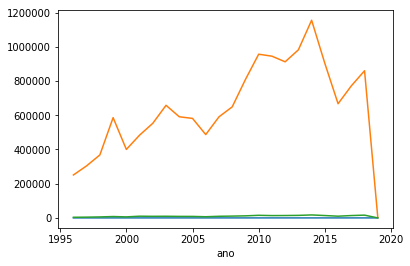

In [50]:
# Plotando um gráfico comparativo do ganhadores por tipo de prêmio
sena_ganhadores.plot()
quadra_ganhadores.plot()
quina_ganhadores.plot()

O gráfico não ficou muito informativo devido a diferença entre os valores de cada tipo de ganhadores.
Para plotar um gráfico melhor, iremos utilizar a proporção de cada tipo de ganhadores.

In [51]:
# Proporções
# Totais
total_sena = df['ganhadores_sena'].sum()
valor_sena = df['rateio_sena'].sum()
total_quina = df['ganhadores_quina'].sum()
valor_quina = df['rateio_quina'].sum()
total_quadra = df['ganhadores_quadra'].sum()
valor_quadra = df['rateio_quadra'].sum()

# Proporção
sena_ganhadores = sena_ganhadores / total_sena
sena_valores = sena_valores / valor_sena
quina_ganhadores = quina_ganhadores / total_quina
quina_valores = quina_valores / valor_quina
quadra_ganhadores = quadra_ganhadores / total_quadra
quadra_valores = quadra_valores / valor_quadra

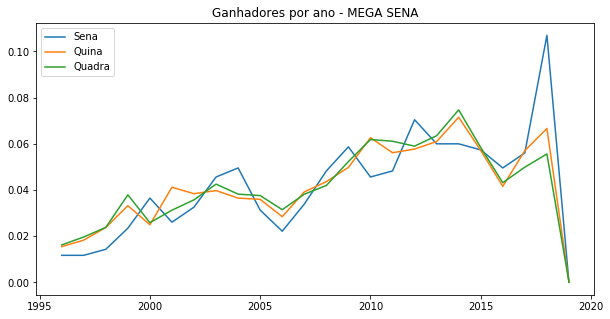

In [52]:
# Plotando um gráfico com os valores proporcionais - GANHADORES

sena_ganhadores.plot(label='Sena', figsize=(10,5))
quina_ganhadores.plot(label='Quina')
quadra_ganhadores.plot(label='Quadra')
plt.title('Ganhadores por ano - MEGA SENA')
plt.xlabel('')
plt.legend();

Podemos observar certa semelhança na variação dos ganhadores por ano, apresentando poucos pontos de maior diferença.

Vemos um crescimento linear até __2004__, então observamos uma até __2006__ queda e novo crescimento até __2014__ com nova queda.

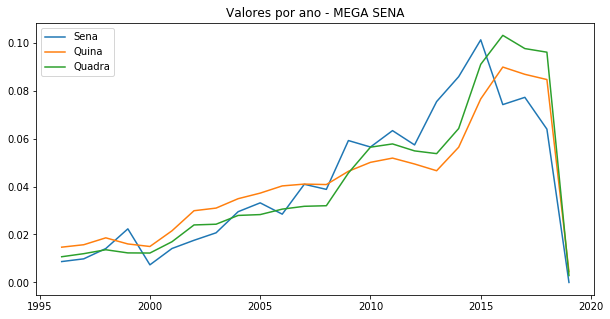

In [53]:
# Plotando um gráfico com os valores proporcionais - GANHADORES

sena_valores.plot(label='Sena', figsize=(10,5))
quina_valores.plot(label='Quina')
quadra_valores.plot(label='Quadra')
plt.title('Valores por ano - MEGA SENA')
plt.xlabel('')
plt.legend();

Podemos observar que proporcionalmente os valores distribuidos seguem um crescimento lienar até _2015/2016_ e então iniciam uma queda.

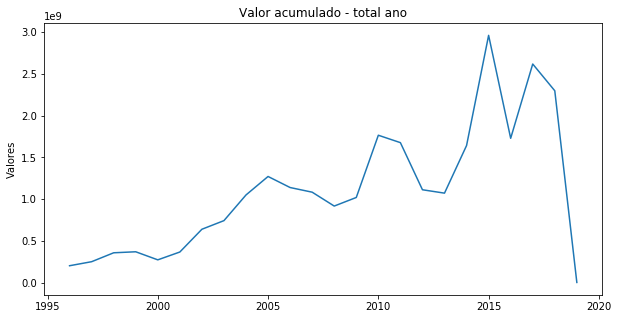

In [54]:
# Valor acumulado

valor_acumulado = df.groupby('ano')['valor_acumulado'].sum()
valor_acumulado.plot(figsize=(10,5))
plt.title('Valor acumulado - total ano')
plt.xlabel('')
plt.ylabel('Valores');

Não encontramos maiores informações sobre como funciona o __valor acumulado__ na mega sena, portando não podemos fazer maiores considerações, apenas que segue uma linha crescente apesar de toda a variação apresentada.

In [55]:
# Grafico com o VALOR ACUMULADO e premiações por categoria

In [56]:
# Fazendo a propoção do VALOR ACUMULADO

total_acumulado = df['valor_acumulado'].sum()
valor_acumulado = valor_acumulado / total_acumulado

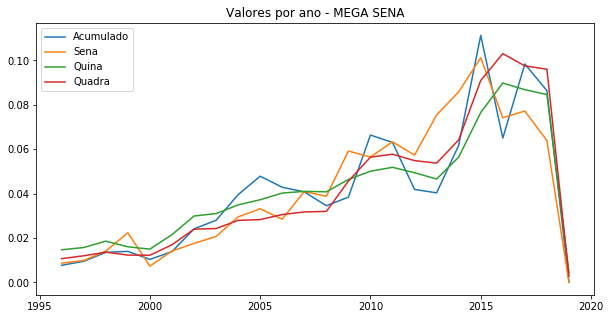

In [57]:
# Plotando o gráfico

valor_acumulado.plot(label='Acumulado', figsize=(10,5))
sena_valores.plot(label='Sena')
quina_valores.plot(label='Quina')
quadra_valores.plot(label='Quadra')
plt.title('Valores por ano - MEGA SENA')
plt.xlabel('')
plt.legend();

Observamos que o valor acumulado também segue padrão semelhante ao das premiações, pois apesar de não sabermos em detalhes, sabemos que existe relação entre o valor que acumula e as premiações

## Conclusão

Como observado nos dados expostos acima, seguiram uma trajetório de crescimento até _2015/2016_ e então iniciaram uma queda registrada até o momento.

A proporção de ganhadores na sena, quina e quadra seguem trajetória parecida entre si e assim como os valores apresentam uma queda a partir de 2015.

Com base nas informações da CAIXA, verificamos que o valor arrecadado é bem superior que o das premiações.

### Limitações

Nosso dataframe foi importado a partir de um arquivo _.htm_ e apresentou algumas inconsistencias durante a analise devido a algumas quebras de valores que foram interpretadas como quebra de linha.

- Para contornar o problema removemos as linhas criadas de forma a não afetar nossas analises

As colunas foram importadas como _string_ o que nos levou a realizar as devidas conversões:
- data_sorteio - convertida para datetime
- demais colunas - convertidas para int, mesmo as colunas que tratam de valores foram convertidas para int para facilitar a manipulação de valores altos, e por trabalharmos com valores na casa dos milhões e bilhões, o descarte dos centavos não afetam os resultados finais.

### Aqui iremos chamar a função PALPITE para elaborar palpites baseados no df

In [58]:
# Dados para elaboração do palpite
# Alterar apenas estas duas variaveis

palpitar = 2
bolas = 0

In [59]:
# Rodando a função com 
palpite(palpitar,bolas,6,df)

Palpite 1
30 - 32 - 56 - 36 - 12 - 17 - 

Palpite 2
30 - 17 - 54 - 5 - 38 - 33 - 



### Ultimo resultado da Mega

In [60]:
df.tail(1)

,concurso,data_sorteio,1,2,3,4,5,6,ganhadores_sena,rateio_sena,ganhadores_quina,rateio_quina,ganhadores_quadra,rateio_quadra,valor_acumulado,ano
2111,2112,2019-05-01,17,46,43,53,52,39,0,0,34,48935,2547,933,4312684,2019


__Fabiano__ _Lima_ - 14/12/2018